In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns;
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [9]:
df=pd.read_csv('C:/Users/Pc/Downloads/mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [11]:
df.shape

(1453, 15)

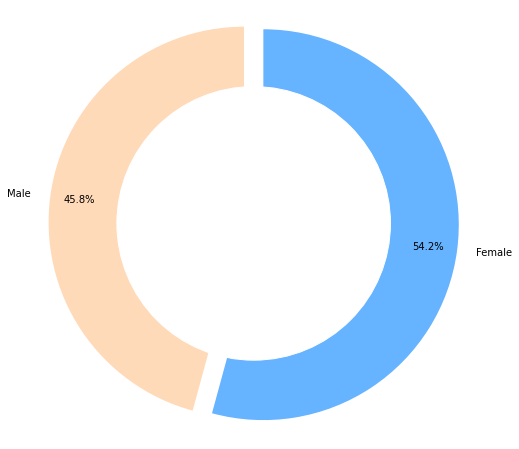

In [12]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


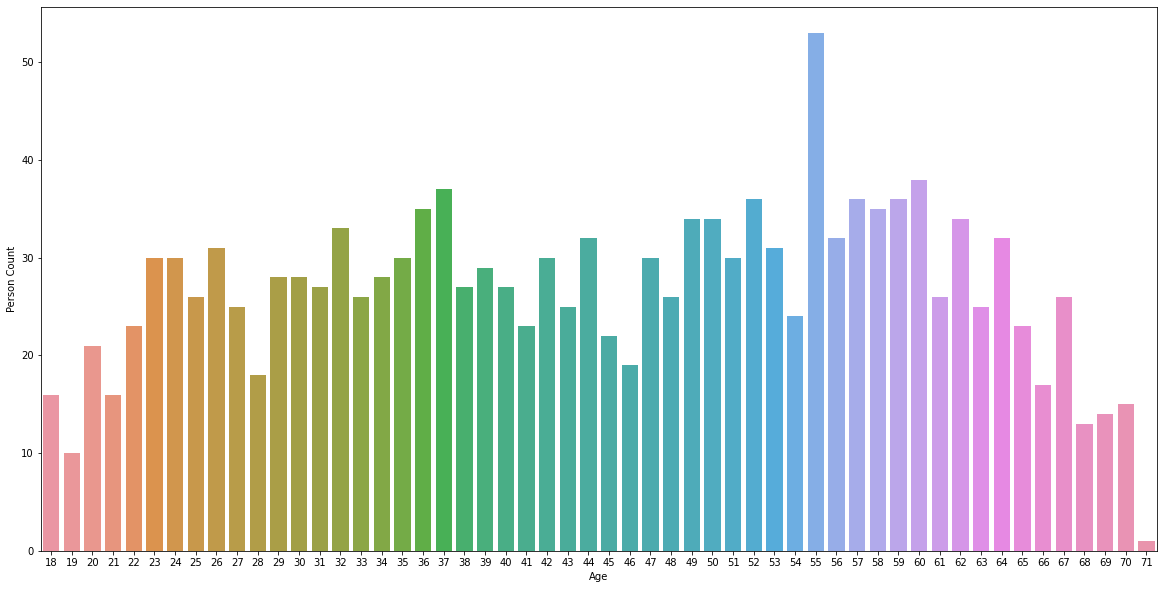

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(df.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

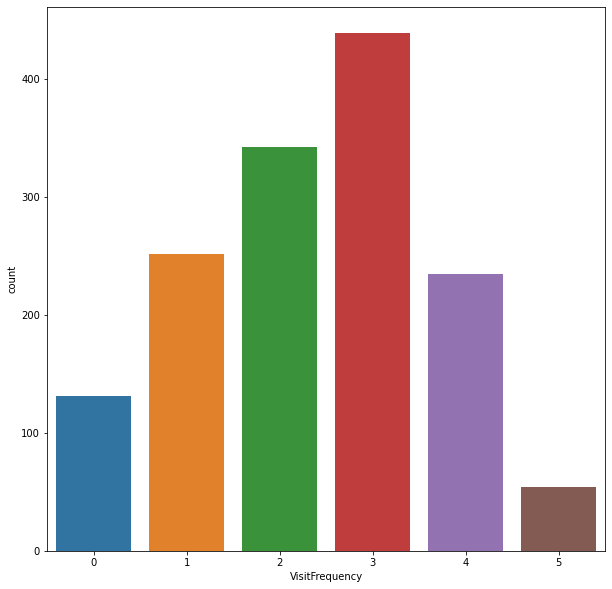

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='VisitFrequency')
plt.show()


In [14]:
df.replace(['Female','Male','Other'],[0,1,2],inplace=True)
df.replace(['No','Yes'],[0,1],inplace=True)
df.replace(['I hate it!-5','I love it!+5'],[-5,+5],inplace=True)
df.replace(['More than once a week','Once a week','Once a month','Every three months','Once a year','Never'],[5,4,3,2,1,0],inplace=True)

In [17]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [18]:
df['Like'] = df['Like'].astype('int64')

In [19]:
print(df.dtypes)

yummy             int64
convenient        int64
spicy             int64
fattening         int64
greasy            int64
fast              int64
cheap             int64
tasty             int64
expensive         int64
healthy           int64
disgusting        int64
Like              int64
Age               int64
VisitFrequency    int64
Gender            int64
dtype: object


In [6]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,1


In [20]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,2.383345,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.292987,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


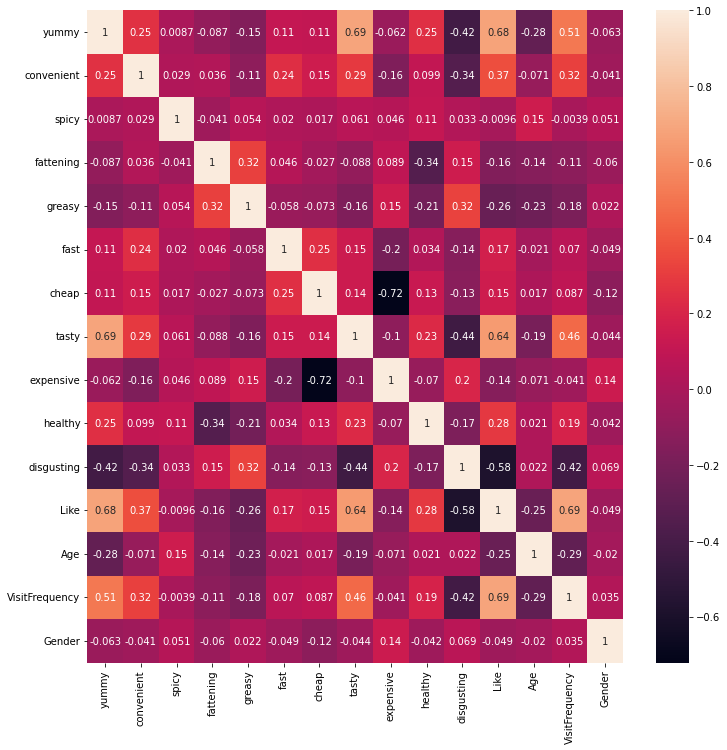

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [47]:
X=df.iloc[: , :11].values
X

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns =['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [49]:
print(principalDf.std())
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))


pc1     0.757050
pc2     0.607456
pc3     0.504619
pc4     0.398799
pc5     0.337405
pc6     0.310275
pc7     0.289697
pc8     0.275122
pc9     0.265251
pc10    0.248842
pc11    0.236903
dtype: float64
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [50]:
#np.cov(principalDf.T)
cov_data=np.corrcoef(principalDf.T)

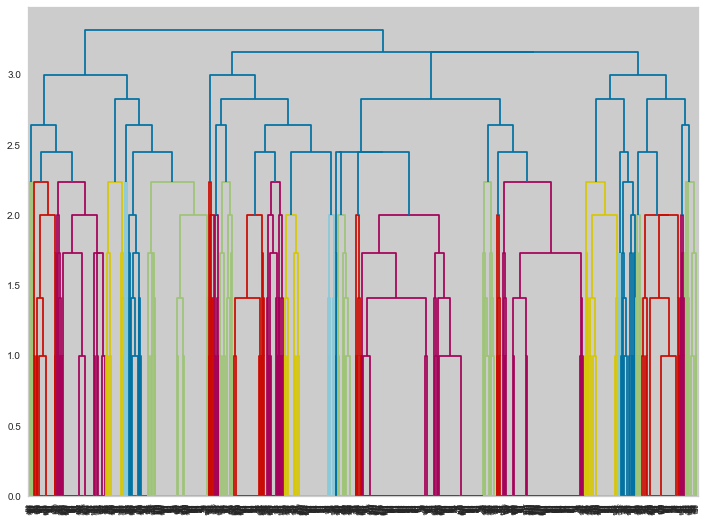

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(principalDf, 'complete')

#labelList = range(1, 11)

plt.figure(figsize=(12, 9))
dendrogram(linked, orientation='top')
plt.show()

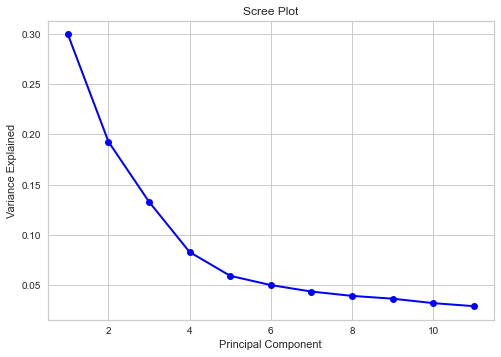

In [51]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

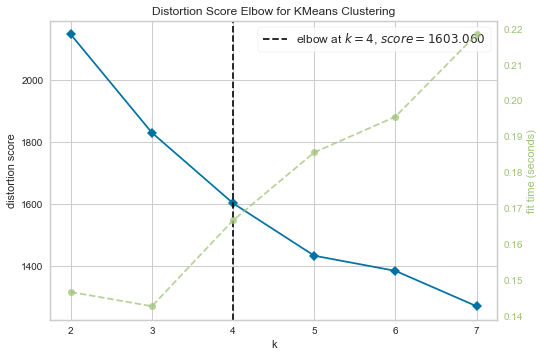

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
model = KMeans(n_clusters=2, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,8))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [54]:
df['Labels']=model.labels_
print (model.labels_)

[0 3 1 ... 1 2 4]


In [55]:
centroids = model.cluster_centers_
print(centroids)

[[ 7.40740741e-03  8.74074074e-01  6.29629630e-02  9.11111111e-01
   5.96296296e-01  9.37037037e-01  8.48148148e-01  6.66133815e-16
   1.48148148e-02  7.40740741e-02  4.22222222e-01]
 [ 8.69402985e-01  9.62686567e-01  1.30597015e-01  8.88059701e-01
   5.37313433e-01  8.47014925e-01  4.47761194e-02  9.40298507e-01
   1.00000000e+00  2.35074627e-01  9.32835821e-02]
 [ 9.33701657e-01  9.88950276e-01  9.94475138e-02  5.41436464e-01
   1.82320442e-01  9.61325967e-01  9.33701657e-01  9.66850829e-01
   3.86740331e-02  1.00000000e+00  1.65745856e-02]
 [ 1.00000000e+00  9.85000000e-01  8.00000000e-02  9.80000000e-01
   1.00000000e+00  9.55000000e-01  8.85000000e-01  9.40000000e-01
   8.50000000e-02  1.50000000e-02  1.50000000e-01]
 [ 1.82648402e-02  6.57534247e-01  7.76255708e-02  9.31506849e-01
   7.26027397e-01  7.39726027e-01  5.93607306e-02  7.30593607e-02
   9.68036530e-01  5.93607306e-02  7.12328767e-01]
 [-1.11022302e-16  9.66666667e-01  1.50000000e-01  9.16666667e-01
   5.66666667e-01  

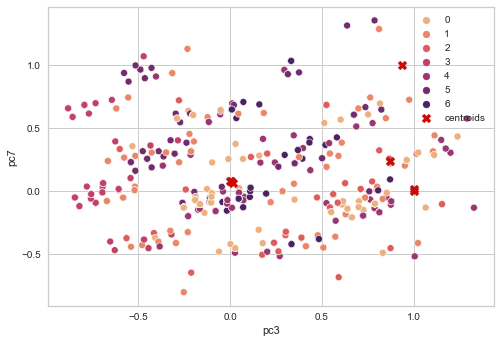

In [66]:
#Visulazing clusters
sns.scatterplot(data=principalDf, x="pc3", y="pc7",hue=model.labels_,palette="flare")
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,9], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()